In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
!pip install geopandas

In [4]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# We import dblp from google drive
id='1bfZzGpT5jQwYuLHfdgPO_4JSLyPsIVBR'

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('globalterrorismdb_0919dist.xlsx')  
dblp = pd.read_excel('globalterrorismdb_0919dist.xlsx',index_col='eventid')

In [5]:
dblp.head()

,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
eventid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [0]:
# Keep only datas with political social economical or social goal, with intention to coerce,... and outsie international humanitarian law
terr_df = dblp[dblp.crit1.isin([1])&dblp.crit2.isin([1])&dblp.crit3.isin([1])]

# Keep variabls of interest
features_col = ['iyear','imonth','iday','country_txt','city','region_txt','attacktype1_txt','attacktype2_txt','attacktype3_txt',
                'targtype1_txt','targtype2_txt','weaptype1_txt','weaptype2_txt','weaptype3_txt','weaptype4_txt','gname',
                'nkill','nkillter']
              
terr_df = terr_df[features_col]

terr_df.to_csv('final_terrorism.csv')

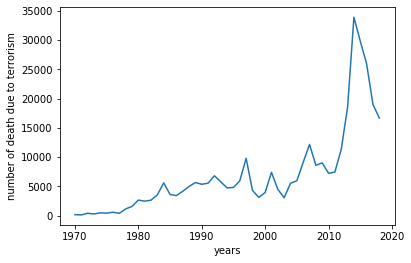

In [8]:
terr_df_year = terr_df.groupby('iyear')['nkill'].sum()
plt.plot(terr_df_year.index, terr_df_year)
plt.xlabel('years')
plt.ylabel('number of death due to terrorism')
plt.show()

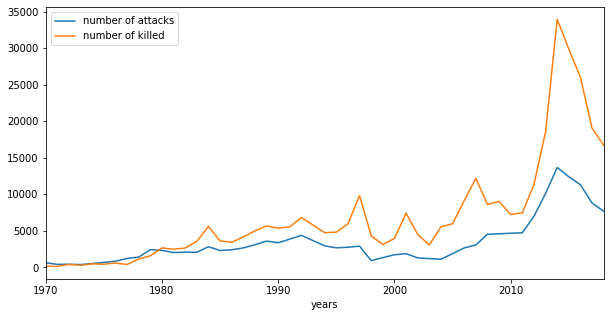

In [9]:
terr_df_att= terr_df['iyear'].value_counts()

plt.figure(figsize=(10,5))
terr_df_att.sort_index().plot()
plt.plot(terr_df_year.index, terr_df_year)
plt.legend(['number of attacks','number of killed'])
plt.xlabel('years')
plt.show()

In [10]:
terr_df['nkill'].describe()

count    155042.000000
mean          2.155616
std          10.372128
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        1385.000000
Name: nkill, dtype: float64

In [0]:
def plot_attack_kill_more_than(number):
  terr_impact = terr_df[terr_df['nkill'] > number]
  terr_impact['iyear'].value_counts().sort_index().plot(kind='bar')
  plt.xlabel('years')
  plt.ylabel('attack that killed more than {} peoples'.format(str(number)))
  plt.show()

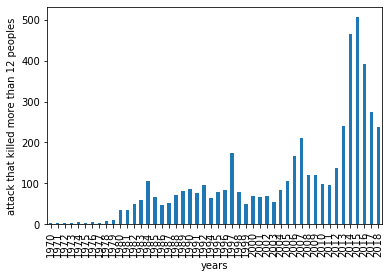

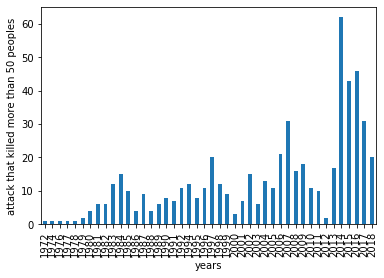

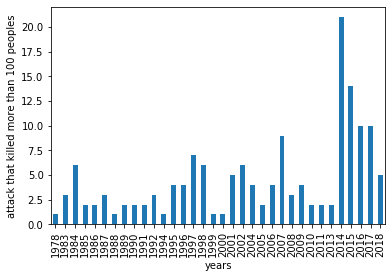

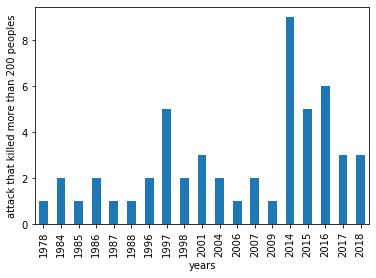

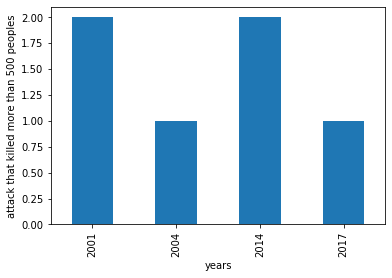

In [12]:
number_to_test = [12, 50, 100, 200, 500]

for n in number_to_test:
  plot_attack_kill_more_than(n)

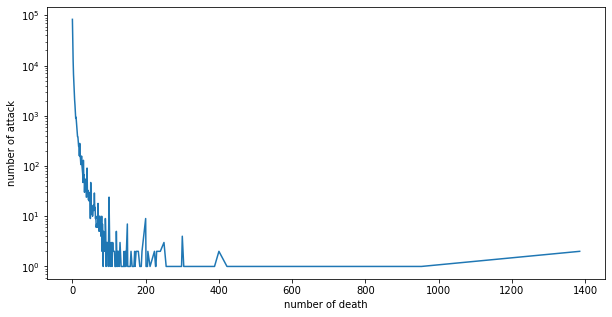

In [14]:
#study distribution of attack
plt.figure(figsize=(10,5))
plt.plot(terr_df.nkill.value_counts().sort_index(ascending = False))
plt.xlabel('number of death')
plt.ylabel('number of attack')
plt.yscale('log')
plt.show()
terr_death_per_attack  =  terr_df.nkill.value_counts().sort_index(ascending = False)

In [0]:
terr_dist_kill_df = pd.DataFrame(columns=['killed_more_than','nattack'])
for i in terr_df['nkill'].value_counts().index : 
  terr_dist_kill_df = terr_dist_kill_df.append({'killed_more_than' : i , 'nattack' : len(terr_df[terr_df['nkill'] > i])},ignore_index=True) 

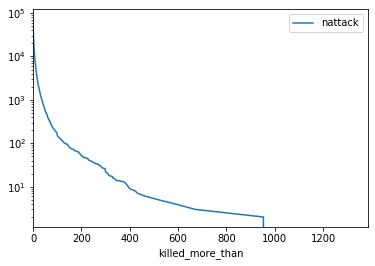

In [145]:
terr_dist_kill_df.sort_values('killed_more_than').plot(x='killed_more_than', y= 'nattack')
plt.yscale('log')
plt.show()

# New Section